<h1>**Support Vector Machine on German Credit Risk data set**</h1>

# Tables of Content:

**1. [Introduction](#intro_svm)** <br>
    - Information about the data set <br>
**2. [Reason for using this model](#reasons_svm)** <br>
    - The purpose of this specific model <br>
**3. [Libraries](#libraries_svm)** <br>
    - Importing Libraries <br>
    - Importing Dataset <br>
**4. [Preprocess](#preprocessing_svm)** <br>
    - 4.1 Separating feature and target variables <br>
    - 4.2 [Feature Selection](#feature_selection_svm)<br>
    - 4.3 [Spliting the X and Y in train and test](#split_svm)<br>
**5. [Models](#modelling_svm)**<br>
    - 5.1 [Support Vector Machines](*models_svm)<br>
    - 5.2 [Metrics](#metrics_svm)<br>
    - 5.3 [Confusion Matrix and Classification Report](#conmat_svm)<br>
**6. [Conclusion and Benefits of the model](#summary_svm)** <br>
    The summary of the model implementation

<a id="intro_svm"></a> <br>
# **1. Introduction:** 
<h2>Context</h2>
The original dataset contains 1000 entries with 9 feature variables. In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes.

<h2>Content</h2>
I have cleaned and preprocessed the data already and also I have created a more relevant feature from two of the most important feature in the data set i.e. Credit amount and Duration. The preprocessed data set is already saved in a CSV file and we are going to use that file for our model training and testing purposes. The selected variables from the orginal data set are:

<b>Age</b> ################### (numeric)<br>
<b>Sex</b> ################### (text: male, female)<br>
<b>Job</b> ################### (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)<br>
<b>Housing</b> ################ (text: own, rent, or free)<br>
<b>Saving accounts</b> ######## (text - little, moderate, quite rich, rich)<br>
<b>Checking account</b> ####### (numeric, in DM - Deutsch Mark)<br>
<b>Credit amount</b> ########## (numeric, in DM)<br>
<b>Duration</b> ############### (numeric, in month)<br>
<b>Purpose</b> ################ (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others<br>
<b>Risk </b> ################## (Value target - Good or Bad Risk)<br>

<a id="reasons_svm"></a> <br>
# **2. Reason for using this model**
<h2>Our goal is to: </h2>

- Implement Support Vector Machine on German Credit Risk data set.
- Assess the different metrics.
- See the impact of scaling the data after log transformation on the metrics and False Positive Rate (FPR).
- Using Hyperparameter optimization (particularly, GridSearchCV), estimate the best parameters.
- Using the best hyperparameters, fit the model and see its impact on the metrics and FPR>

<a id="libraries_svm"></a> <br>
# **3. Libraries**

### Imports

In [1]:
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd

from scipy import stats 
import math

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

from colorsetup import colors, palette

### Read the data

In [2]:
gcr_data = pd.read_csv("gcr_data_imputed2.csv")
#gcr_data = pd.read_csv("gcr_data_imputed.csv")
#gcr_data = pd.read_csv("gcr_processed.csv")

In [3]:
gcr_data.head()

,Age,Sex,Job,Credit amount,Duration,Housing_free,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,...,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk
0,4.219508,0.693147,2,7.064759,1.945910,0.0000,0.6934,0.0,0,0.0,...,0.0,0.0,0,0.0,0.0000,0.0000,0.6934,0.0,0.0,1
1,3.135494,0.000000,2,8.691483,3.891820,0.0000,0.6934,0.0,1,0.0,...,0.0,0.0,0,0.0,0.0000,0.0000,0.6934,0.0,0.0,0
2,3.912023,0.693147,1,7.648263,2.564949,0.0000,0.6934,0.0,1,0.0,...,0.0,0.0,0,0.0,0.6934,0.0000,0.0000,0.0,0.0,1
3,3.828641,0.693147,2,8.972464,3.761200,0.6934,0.0000,0.0,1,0.0,...,0.0,0.0,0,0.0,0.0000,0.6934,0.0000,0.0,0.0,1
4,3.988984,0.693147,2,8.491055,3.218876,0.6934,0.0000,0.0,1,0.0,...,0.0,0.0,1,0.0,0.0000,0.0000,0.0000,0.0,0.0,0


In [4]:
gcr_data['Credit_amount/duration'] = gcr_data['Credit amount']/gcr_data['Duration']

In [5]:
gcr_data.head()

,Age,Sex,Job,Credit amount,Duration,Housing_free,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,...,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk,Credit_amount/duration
0,4.219508,0.693147,2,7.064759,1.945910,0.0000,0.6934,0.0,0,0.0,...,0.0,0,0.0,0.0000,0.0000,0.6934,0.0,0.0,1,3.630568
1,3.135494,0.000000,2,8.691483,3.891820,0.0000,0.6934,0.0,1,0.0,...,0.0,0,0.0,0.0000,0.0000,0.6934,0.0,0.0,0,2.233269
2,3.912023,0.693147,1,7.648263,2.564949,0.0000,0.6934,0.0,1,0.0,...,0.0,0,0.0,0.6934,0.0000,0.0000,0.0,0.0,1,2.981838
3,3.828641,0.693147,2,8.972464,3.761200,0.6934,0.0000,0.0,1,0.0,...,0.0,0,0.0,0.0000,0.6934,0.0000,0.0,0.0,1,2.385532
4,3.988984,0.693147,2,8.491055,3.218876,0.6934,0.0000,0.0,1,0.0,...,0.0,1,0.0,0.0000,0.0000,0.0000,0.0,0.0,0,2.637894


<a id="preprocessing_svm"></a> <br>
# **4. Preprocess**

<h2>4.1 Separating feature and target</h2>

In [6]:
#X = gcr_data.drop(['Risk','Credit_amount/duration'], axis=1)
X = gcr_data.drop(['Risk', 'Credit amount'], axis=1)
#X = gcr_data.drop(['Risk'], axis=1)

y = gcr_data['Risk']

In [7]:
X.shape

(1000, 23)

<a id="feature_selection_svm"></a>
<h2>4.2 Feature Selection</h2>

### 1. Univariate Selection

In [8]:
#apply SelectKBest class to extract top 5 best features
bestfeatures = SelectKBest(score_func=chi2, k=6)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [9]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']  #naming the dataframe columns
print(featureScores.nlargest(10, 'Score'))  #print best features

                         Specs      Score
11     Checking account_little  33.595555
7       Saving accounts_little  10.291479
12   Checking account_moderate   7.248111
19            Purpose_radio/TV   5.707578
6                 Housing_rent   4.901023
10        Saving accounts_rich   4.853800
3                     Duration   4.699713
4                 Housing_free   4.113929
5                  Housing_own   3.604819
9   Saving accounts_quite rich   3.270982


In [10]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

model_eval = SVC()

results = list()
for i in range(1,X.shape[1]+1):
        scores = evaluate_model(model_eval, X[featureScores.nlargest(i, 'Score')['Specs']], y)
        results.append(scores)
        print('> %s) %.3f (%.3f)' % (i, mean(scores), std(scores)))

> 1) 0.687 (0.030)
> 2) 0.703 (0.036)
> 3) 0.703 (0.036)
> 4) 0.704 (0.031)
> 5) 0.705 (0.033)
> 6) 0.707 (0.035)
> 7) 0.725 (0.024)
> 8) 0.723 (0.023)
> 9) 0.722 (0.018)
> 10) 0.722 (0.018)
> 11) 0.722 (0.018)
> 12) 0.722 (0.018)
> 13) 0.721 (0.018)
> 14) 0.721 (0.019)
> 15) 0.718 (0.017)
> 16) 0.717 (0.016)
> 17) 0.717 (0.015)
> 18) 0.719 (0.014)
> 19) 0.719 (0.015)
> 20) 0.705 (0.010)
> 21) 0.706 (0.010)
> 22) 0.702 (0.006)
> 23) 0.702 (0.005)


In [18]:
#X = gcr_data[featureScores.nlargest(23, 'Score')['Specs'].values]

### 2. Feature Importance

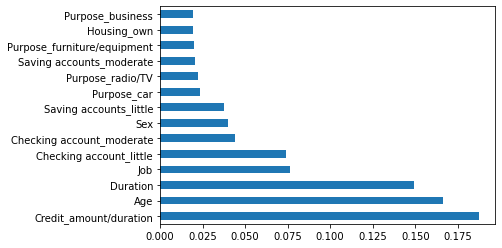

In [11]:
model_fi = ExtraTreesClassifier()
model_fi.fit(X,y)
#print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model_fi.feature_importances_, index=X.columns)
feat_importances.sort_values(ascending=True).nlargest(14).plot(kind='barh')
plt.show()

In [12]:
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

model_eval = SVC()

results = list()
for i in range(1,X.shape[1]+1):
        scores = evaluate_model(model_eval, X[feat_importances.nlargest(i).index], y)
        results.append(scores)
        print('> %s) %.3f (%.3f)' % (i, mean(scores), std(scores)))

> 1) 0.698 (0.004)
> 2) 0.700 (0.000)
> 3) 0.697 (0.008)
> 4) 0.700 (0.000)
> 5) 0.726 (0.027)
> 6) 0.705 (0.013)
> 7) 0.701 (0.004)
> 8) 0.713 (0.016)
> 9) 0.708 (0.011)
> 10) 0.704 (0.011)
> 11) 0.703 (0.008)
> 12) 0.702 (0.006)
> 13) 0.708 (0.011)
> 14) 0.706 (0.009)
> 15) 0.706 (0.010)
> 16) 0.705 (0.010)
> 17) 0.706 (0.011)
> 18) 0.704 (0.007)
> 19) 0.704 (0.007)
> 20) 0.703 (0.006)
> 21) 0.702 (0.006)
> 22) 0.702 (0.006)
> 23) 0.702 (0.005)


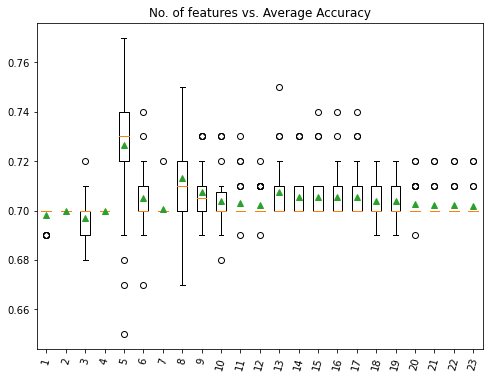

In [13]:
no_of_features = [str(i) for i in range(1,X.shape[1]+1)]
# plot model performance for comparison
plt.figure(figsize=(8,6))
plt.boxplot(results, labels=no_of_features, showmeans=True)
plt.xticks(rotation=75)
plt.title('No. of features vs. Average Accuracy')
plt.show()

### 3. Correlation Matrix with Heatmap

<a id="split_svm"></a>
<h2>4.3 StratifiedShuffleSplit</h2>

In [14]:
X = gcr_data[feat_importances.nlargest(5).index]
#X = gcr_data[featureScores.nlargest(13, 'Score')['Specs']]

#X.head()

In [15]:
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(X, gcr_data.Risk))

# Create the dataframes
X_train = X.loc[train_idx, X.columns]
y_train = gcr_data.loc[train_idx, 'Risk']

X_test  = X.loc[test_idx, X.columns]
y_test  = gcr_data.loc[test_idx, 'Risk']

<a id="modelling_svm"></a> <br>
# **5. Models**

#### Suppressing any warnings

In [16]:
# Suppress warnings about too few trees from the early models
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

<a id="models"></a>
<h2>5.1 Support Vector Machines</h2>

In [17]:
svc = SVC().fit(X_train, y_train)

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

scaler = MinMaxScaler()
X_test_scaled = scaler.fit_transform(X_test)

svc_scaled = SVC().fit(X_train_scaled, y_train)

<AxesSubplot:xlabel='Credit amount', ylabel='Duration'>

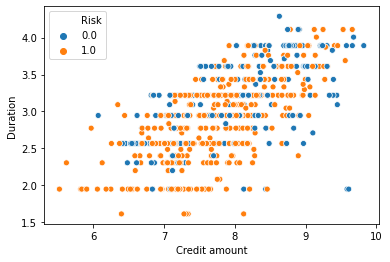

In [19]:
sns.scatterplot(x = gcr_data['Credit amount'], y = gcr_data['Duration'], hue = y_train)

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']} 

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4).fit(X_train_scaled,y_train)

print('\n')
print('#'*80)
print('Best Params: ', grid.best_params_)
print('Best Estimator: ', grid.best_estimator_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.700, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.700, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.700, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.700, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.700, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.700, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.700, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.700, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.700, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.700, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.700, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.700, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.700, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    1.6s finished


<a id="metrics_svm"></a>
<h2>5.2 Metrics</h2>

In [21]:
y_pred_svc = svc.predict(X_test)
y_pred_svc_scaled = svc_scaled.predict(X_test_scaled)
grid_predictions = grid.predict(X_test_scaled)

In [22]:
from sklearn.metrics import accuracy_score

print('SVC: ', accuracy_score(y_test, y_pred_svc))
print('#'*30)
print('SVC_scaled: ', accuracy_score(y_test, y_pred_svc_scaled))
print('#'*30)
print('GridSearchCV SVC: ', accuracy_score(y_test, grid_predictions))

SVC:  0.7166666666666667
##############################
SVC_scaled:  0.75
##############################
GridSearchCV SVC:  0.7466666666666667


<a id="conmat_svm"></a>
<h2>5.3 Confusion Matrix and Classification Report</h2>

<AxesSubplot:>

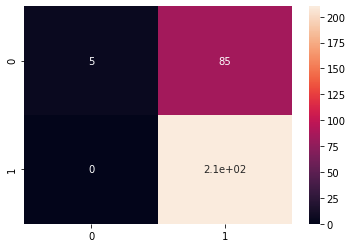

In [23]:
cm = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(cm, annot=True)

<AxesSubplot:>

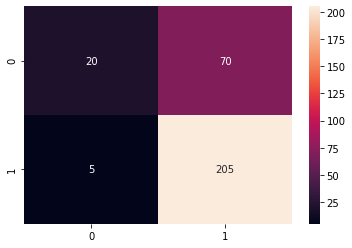

In [24]:
cm_sc = confusion_matrix(y_test, y_pred_svc_scaled)
sns.heatmap(cm_sc,annot=True,fmt="d")

<AxesSubplot:>

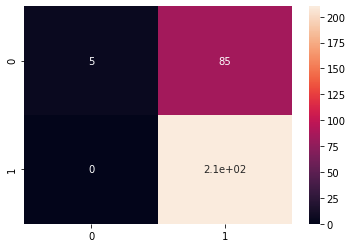

In [25]:
cm_grid = confusion_matrix(y_test, grid_predictions)
sns.heatmap(cm, annot=True)

In [26]:
print('#'*60)
print('SVC')
print(classification_report(y_test, y_pred_svc))

print('\n')
print('#'*60)

print('SVC_scaled')
print(classification_report(y_test, y_pred_svc_scaled))

print('\n')
print('#'*60)

print('SVC_GridSearchCV')
print(classification_report(y_test,grid_predictions))
print('#'*60)

############################################################
SVC
              precision    recall  f1-score   support

           0       1.00      0.06      0.11        90
           1       0.71      1.00      0.83       210

    accuracy                           0.72       300
   macro avg       0.86      0.53      0.47       300
weighted avg       0.80      0.72      0.61       300



############################################################
SVC_scaled
              precision    recall  f1-score   support

           0       0.80      0.22      0.35        90
           1       0.75      0.98      0.85       210

    accuracy                           0.75       300
   macro avg       0.77      0.60      0.60       300
weighted avg       0.76      0.75      0.70       300



############################################################
SVC_GridSearchCV
              precision    recall  f1-score   support

           0       0.85      0.19      0.31        90
           1      

<a id="summary_svm"></a> <br>
# **6. Conclusion and Benefits of the model**
- SVM performs comparably better when number of features are set to 5.
- The maximum accuracy obtained using GridSearchCV is 75% and minimum FPR obtained is 20%.
- SVM performs better when scaled after log transforamation, while other models do not.
- Moreover, as the data set is unbalanced I tried to improve prediction power of the minority class and with the help of GridSearchCV I succeeded in the task.
- Accuracy of the minority class has increased and is comparable to the accuracy of the majority class. This resulted in overall reduction of accuracy, however it is not problematic.
- Polynomial Features i.e. (Credit_amount_duration) helped us to improve the metrics and FPR on this dataset for all implementations.

#########################################################################################################################################